### House Prices: Advanced Regression Techniques
- Part 1: EDA
    * log(salesprice) will behave more like normal distribution
    * variables that are possible to take log form: TotalBsmtSF, KitchenAbvGr, LotFrontage, LotArea, 1stFirSF, GrLivArea
- Part 2:
- Evaluation: Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

test = pd.read_csv("C:\\Users\\chloe\\Google Drive\\Kaggle_Data\\kaggle_house_price\\test.csv")
train = pd.read_csv("C:\\Users\\chloe\\Google Drive\\Kaggle_Data\\kaggle_house_price\\train.csv")

In [2]:
print("train shape:", train.shape) 
print("test shape:", test.shape) 

sales_price = train["SalePrice"]
train.drop("Id", axis=1, inplace=True)
train.drop("SalePrice", axis=1, inplace=True)
test.drop("Id", axis=1, inplace=True)

train shape: (1460, 81)
test shape: (1459, 80)


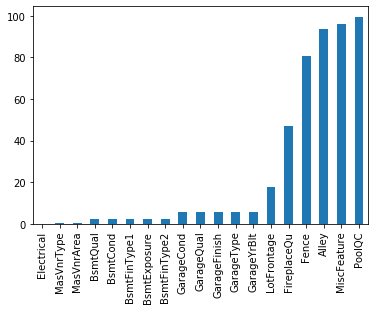

In [8]:
# check missing value
missing = train.isnull().sum()
missing = missing[missing>0]*100/train.shape[0]
missing = missing.sort_values(ascending=True)
missing.plot.bar();

In [9]:
print("features with more than 50% of missing value: ", missing[missing>50].index)

features with more than 50% of missing value:  Index(['Fence', 'Alley', 'MiscFeature', 'PoolQC'], dtype='object')


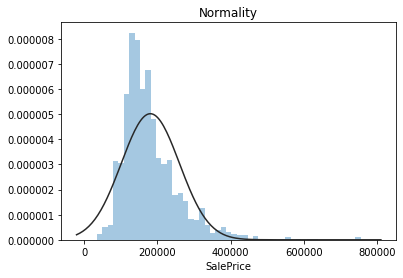

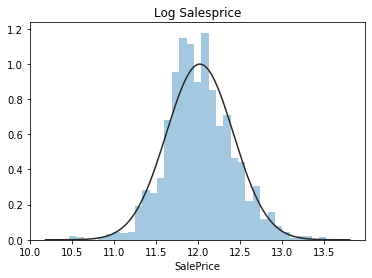

In [4]:
# check the salesprice distribution
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

plt.figure(1)
plt.title("Normality")
sns.distplot(sales_price, kde=False, fit=stats.norm);

plt.figure(2)
plt.title("Log Salesprice")
sns.distplot(np.log1p(sales_price), kde=False, fit=stats.norm);

In [5]:
quantitative = [col for col in train.columns if train[col].dtypes!="object"]
qualitative = [col for col in train.columns if train[col].dtypes=="object"]

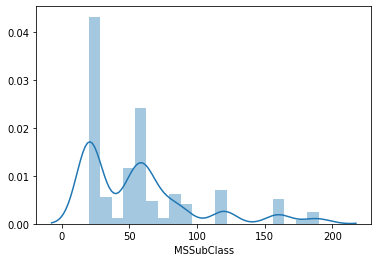

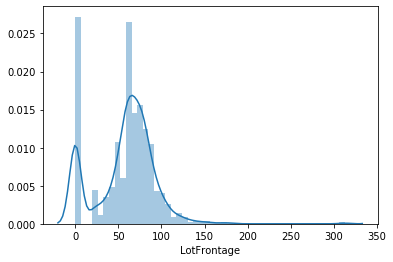

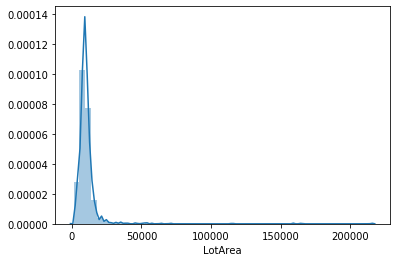

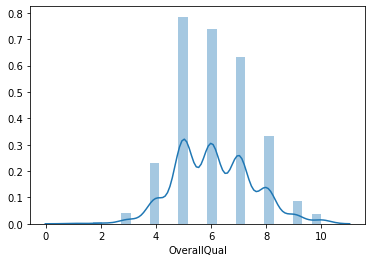

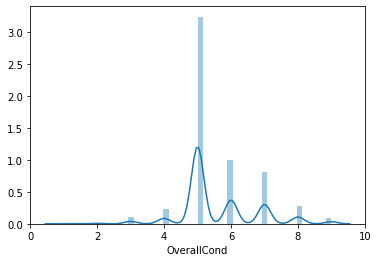

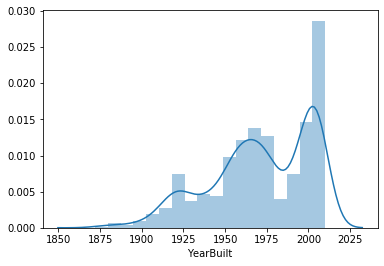

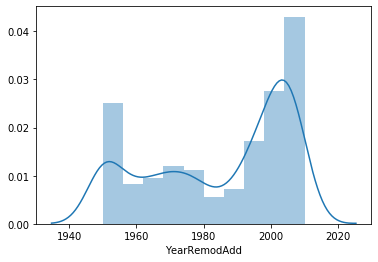

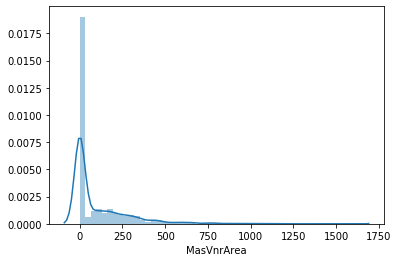

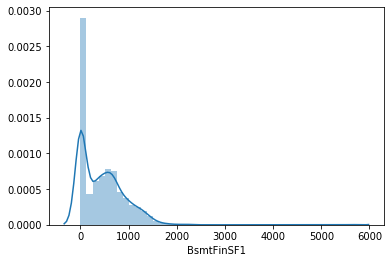

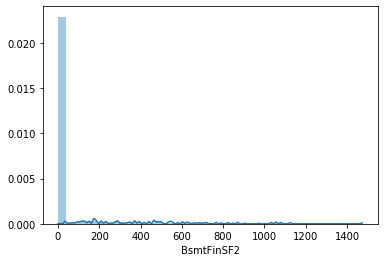

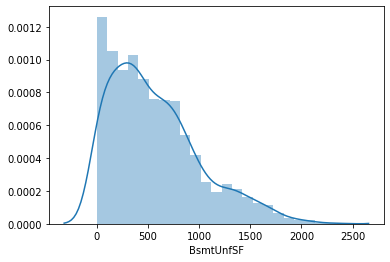

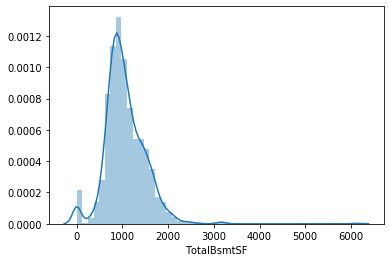

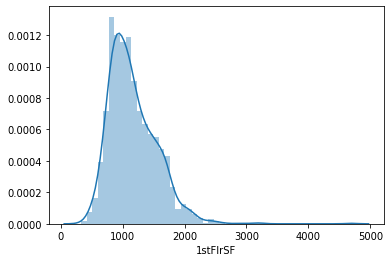

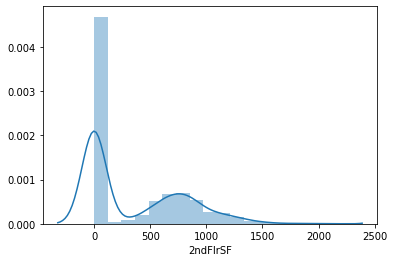

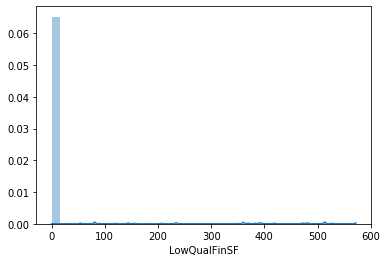

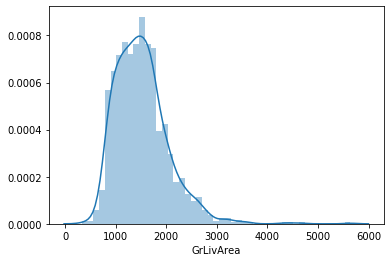

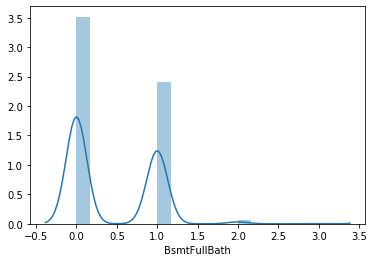

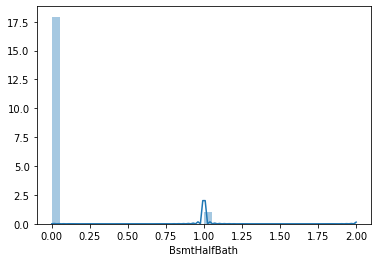

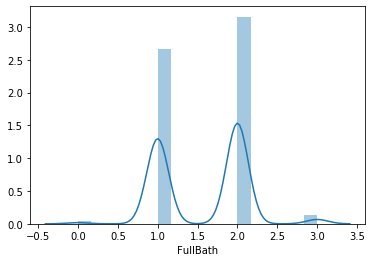

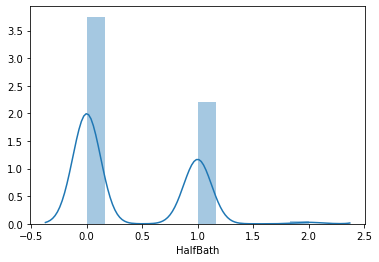

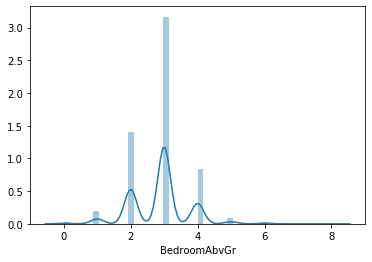

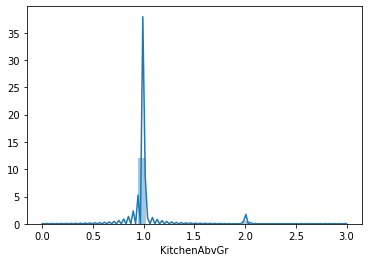

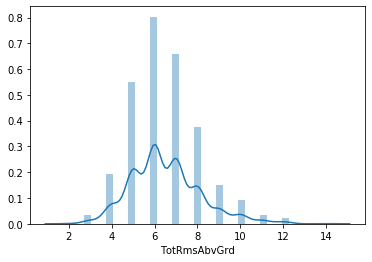

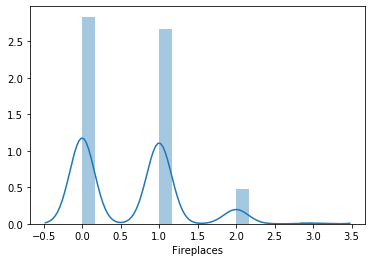

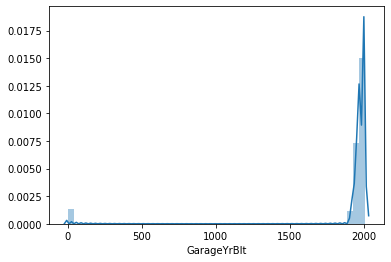

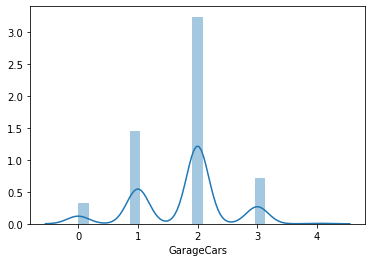

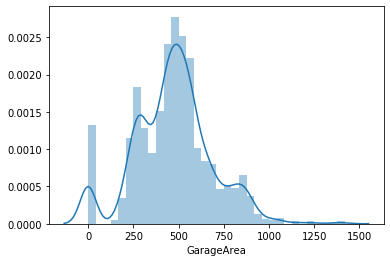

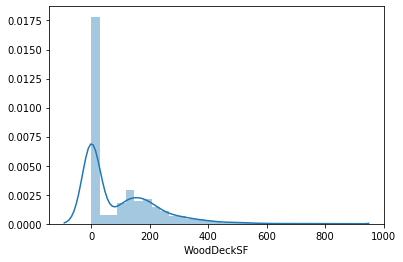

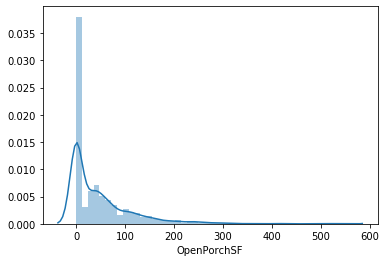

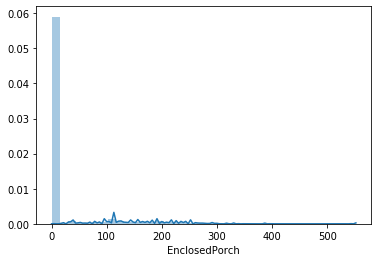

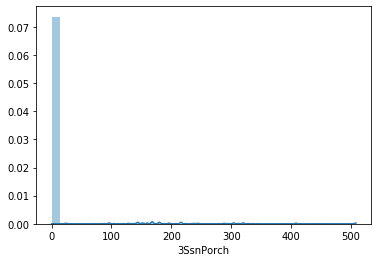

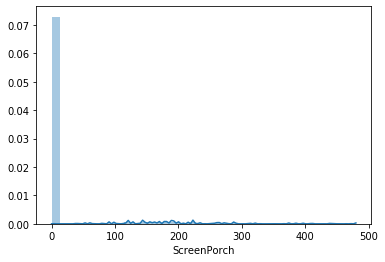

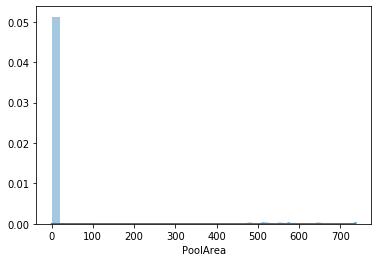

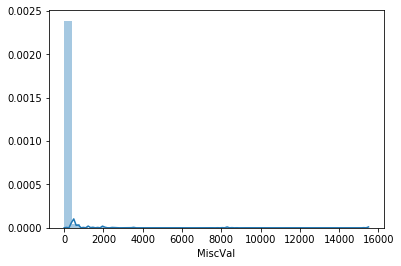

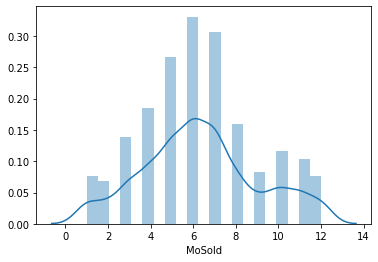

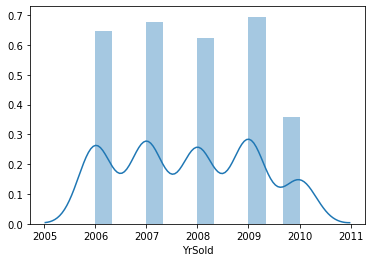

In [6]:
for i in range(len(quantitative)):
    f = train[quantitative[i]].fillna(0)
    j = i+1
    plt.figure(j)
    sns.distplot(f, kde=True);

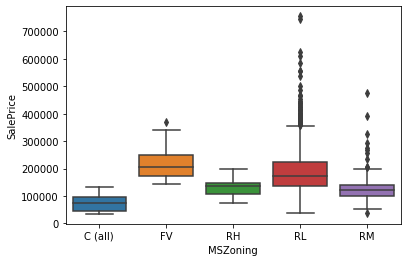

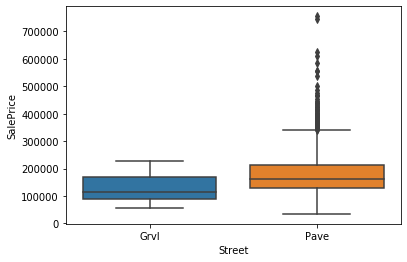

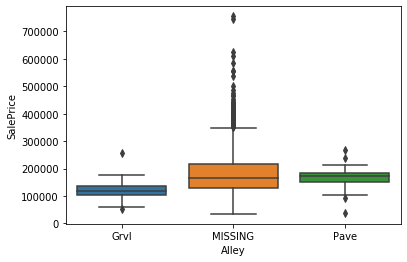

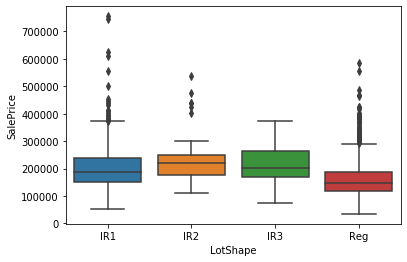

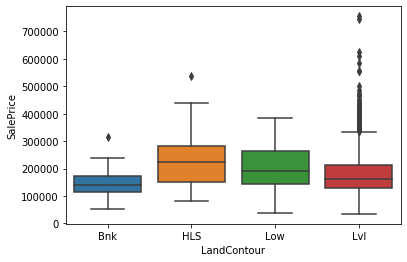

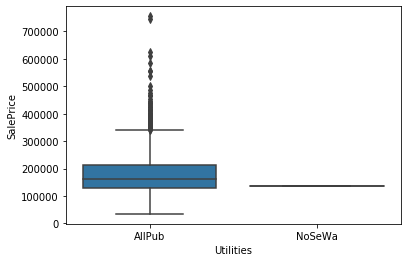

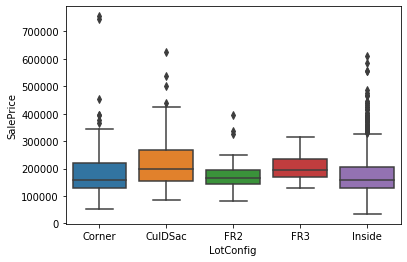

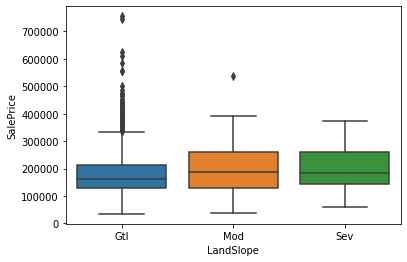

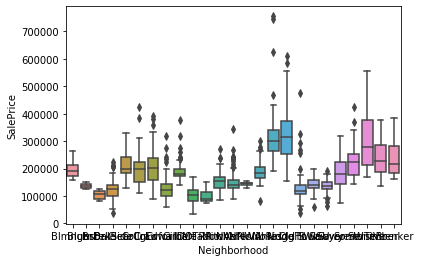

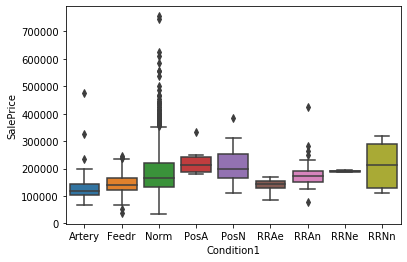

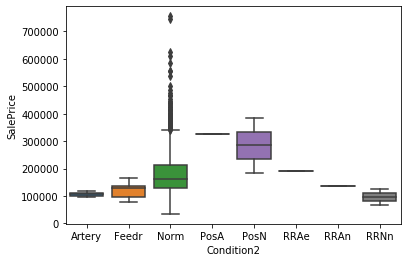

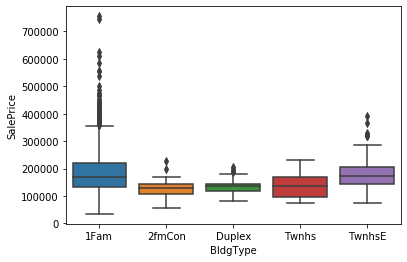

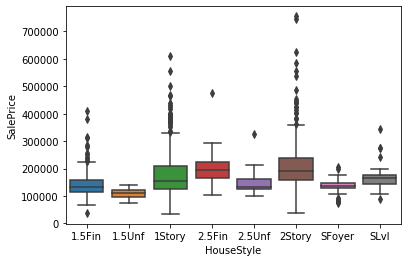

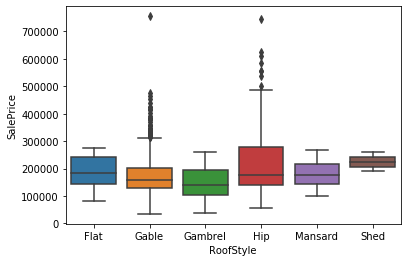

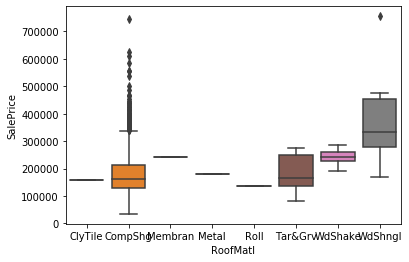

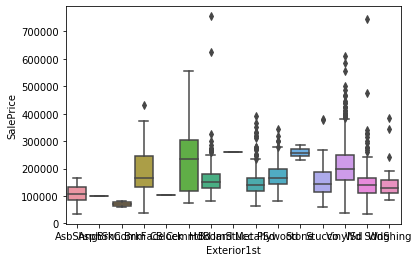

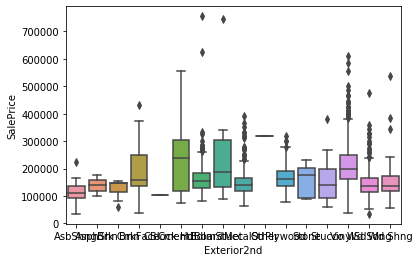

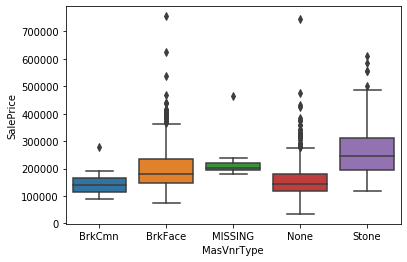

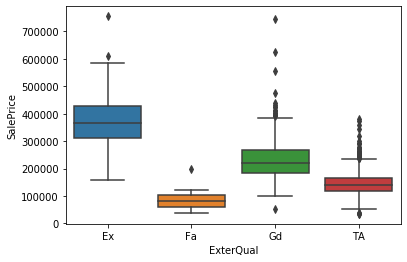

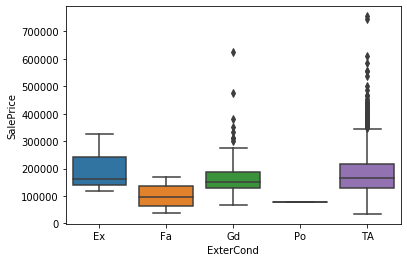

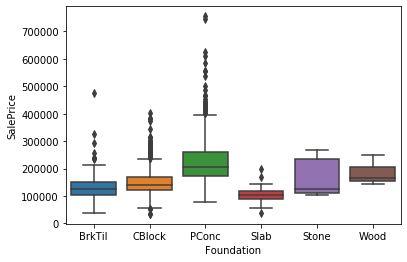

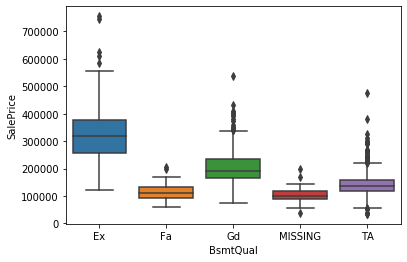

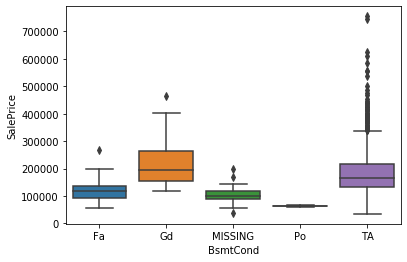

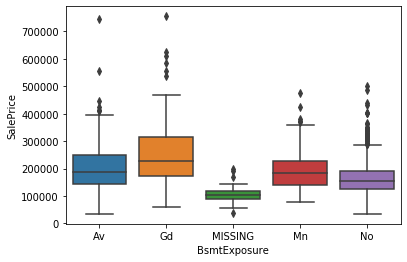

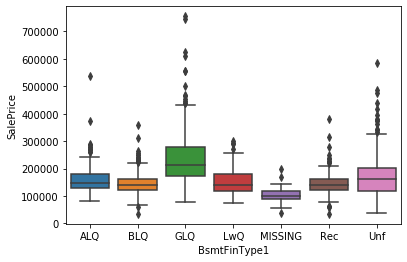

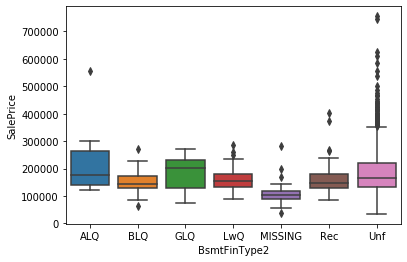

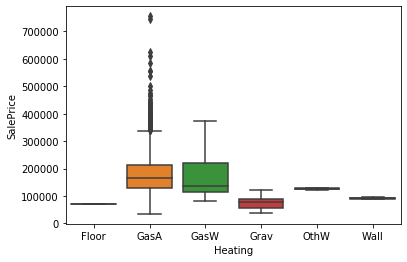

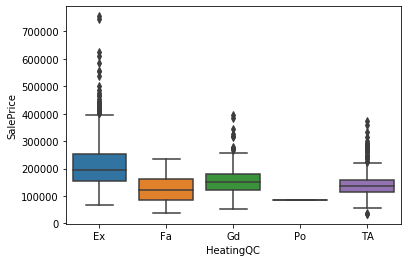

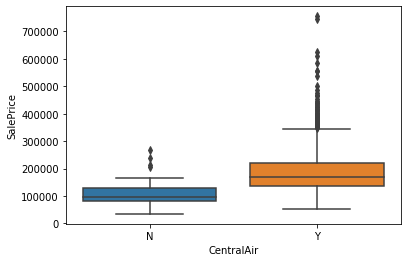

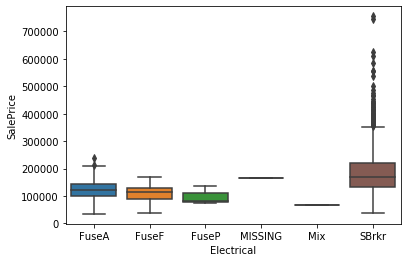

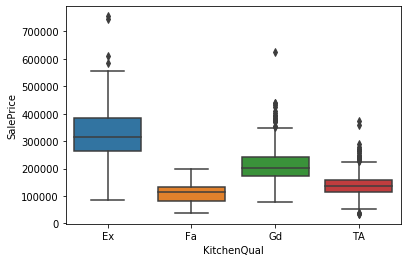

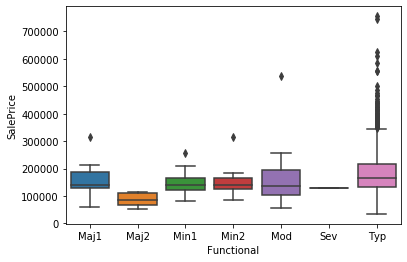

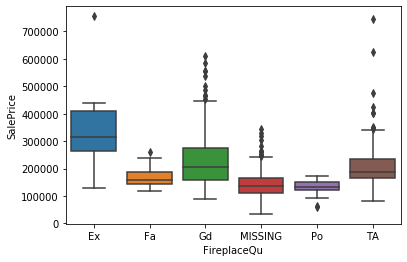

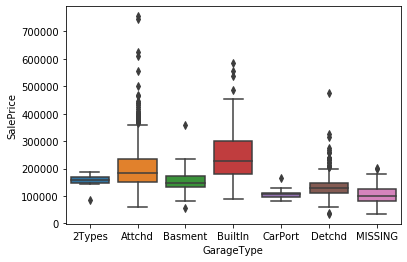

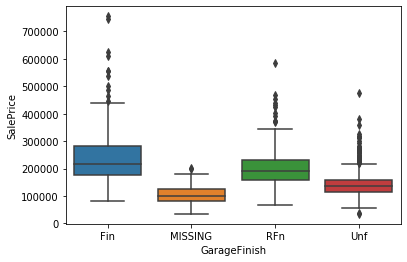

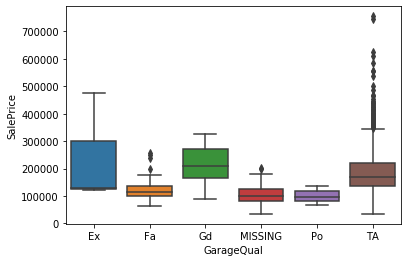

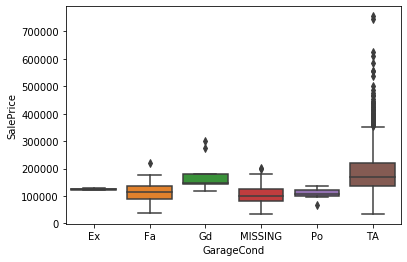

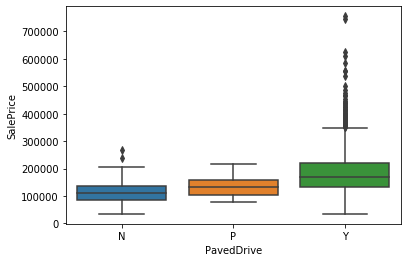

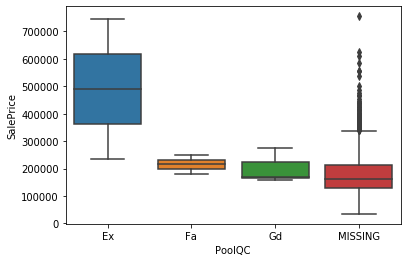

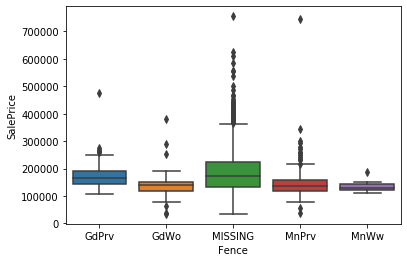

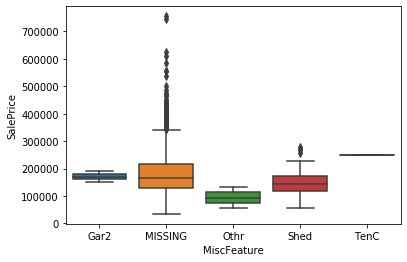

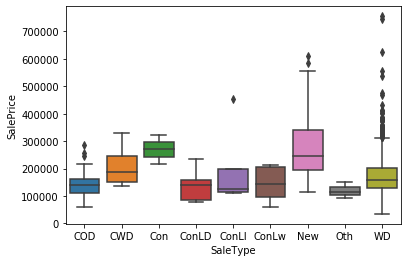

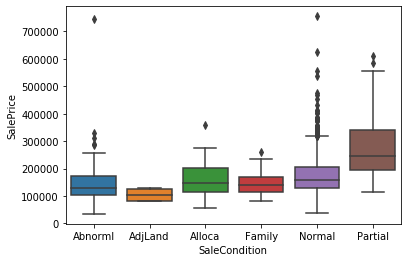

In [7]:
for i in range(len(qualitative)):
    f = train[qualitative[i]].fillna("MISSING")
    f = f.astype("category")
    j = i+1
    plt.figure(j)
    sns.boxplot(x=f, y=sales_price);

In [ ]:
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt

import sklearn.linear_model as linear_model

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import os